In [41]:
import sqlite3 as sq3
import pandas as pd

con = sq3.connect("opioid.db")
# cursor() creates an object that can execute functions in the sqlite cursor

sql = con.cursor()
 
# you have to close the connection
con.close

<function Connection.close()>

In [42]:
population = pd.read_sql_query("SELECT * from population", con)
annual = pd.read_sql_query("SELECT * from annual", con)
land = pd.read_sql_query("SELECT * from land", con)
con.close

<function Connection.close()>

In [43]:
population.head


<bound method NDFrame.head of                BUYER_COUNTY BUYER_STATE countyfips STATE COUNTY  \
0          1        AUTAUGA          AL      01001     1      1   
1          2        BALDWIN          AL      01003     1      3   
2          3        BARBOUR          AL      01005     1      5   
3          4           BIBB          AL      01007     1      7   
4          5         BLOUNT          AL      01009     1      9   
...      ...            ...         ...        ...   ...    ...   
28260  28261       WASHAKIE          WY      56043    56     43   
28261  28262         WESTON          WY      56045    56     45   
28262  28263        SKAGWAY          AK      02230     2    230   
28263  28264  HOONAH ANGOON          AK      02105     2    105   
28264  28265     PETERSBURG          AK      02195     2    195   

         county_name                               NAME    variable  year  \
0            Autauga            Autauga County, Alabama  B01003_001  2006   
1          

In [44]:
annual.head

<bound method NDFrame.head of              BUYER_COUNTY BUYER_STATE  year count DOSAGE_UNIT countyfips
0          1    ABBEVILLE          SC  2006   877      363620      45001
1          2    ABBEVILLE          SC  2007   908      402940      45001
2          3    ABBEVILLE          SC  2008   871      424590      45001
3          4    ABBEVILLE          SC  2009   930      467230      45001
4          5    ABBEVILLE          SC  2010  1197      539280      45001
...      ...          ...         ...   ...   ...         ...        ...
27753  27754           NA          NV  2007   447      200600         NA
27754  27755           NA          NV  2008     5        2200         NA
27755  27756           NA          OH  2006    23        5100         NA
27756  27757           NA          PR  2006    10       17800         NA
27757  27758           NA          PR  2007     2        1300         NA

[27758 rows x 7 columns]>

In [45]:
land.head

<bound method NDFrame.head of                   Areaname  STCOU LND010190F  LND010190D LND010190N1  \
0        1   UNITED STATES  00000          0  3787425.08        0000   
1        2         ALABAMA  01000          0    52422.94        0000   
2        3     Autauga, AL  01001          0      604.49        0000   
3        4     Baldwin, AL  01003          0     2027.08        0000   
4        5     Barbour, AL  01005          0      904.59        0000   
...    ...             ...    ...        ...         ...         ...   
3193  3194  Sweetwater, WY  56037          0    10491.73        0000   
3194  3195       Teton, WY  56039          0     4221.96        0000   
3195  3196       Uinta, WY  56041          0     2087.66        0000   
3196  3197    Washakie, WY  56043          0     2242.85        0000   
3197  3198      Weston, WY  56045          0     2400.13        0000   

     LND010190N2 LND010200F  LND010200D LND010200N1  ... LND110210N1  \
0           0000          0  3794

In [46]:
import pandas as pd
def update(row):
    if row['BUYER_STATE'] == 'AR' and row['BUYER_COUNTY'] == 'MONTGOMERY':
        return '05097'
    else:
        return row['countyfips']
annual['countyfips'] = annual.apply(update, axis=1)

In [47]:
annual = annual[annual['BUYER_COUNTY'] != "NA"]

In [48]:
annual.shape

(27741, 7)

In [49]:
land_area = land[['Areaname', 'STCOU', 'LND110210D']].rename(columns={'STCOU': 'countyfips'}).copy()

In [50]:
land_area.head

<bound method NDFrame.head of             Areaname countyfips  LND110210D
0      UNITED STATES      00000  3531905.43
1            ALABAMA      01000    50645.33
2        Autauga, AL      01001      594.44
3        Baldwin, AL      01003     1589.78
4        Barbour, AL      01005      884.88
...              ...        ...         ...
3193  Sweetwater, WY      56037    10426.65
3194       Teton, WY      56039     3995.38
3195       Uinta, WY      56041     2081.26
3196    Washakie, WY      56043     2238.55
3197      Weston, WY      56045     2398.09

[3198 rows x 3 columns]>

In [51]:
county_info = pd.merge(population, land_area, on='countyfips',how='left')

In [52]:
county_info.head

<bound method NDFrame.head of                BUYER_COUNTY BUYER_STATE countyfips STATE COUNTY  \
0          1        AUTAUGA          AL      01001     1      1   
1          2        BALDWIN          AL      01003     1      3   
2          3        BARBOUR          AL      01005     1      5   
3          4           BIBB          AL      01007     1      7   
4          5         BLOUNT          AL      01009     1      9   
...      ...            ...         ...        ...   ...    ...   
28260  28261       WASHAKIE          WY      56043    56     43   
28261  28262         WESTON          WY      56045    56     45   
28262  28263        SKAGWAY          AK      02230     2    230   
28263  28264  HOONAH ANGOON          AK      02105     2    105   
28264  28265     PETERSBURG          AK      02195     2    195   

         county_name                               NAME    variable  year  \
0            Autauga            Autauga County, Alabama  B01003_001  2006   
1          

In [53]:
import matplotlib.pyplot as plt


In [54]:
annual.loc[:, 'DOSAGE_UNIT'] = pd.to_numeric(annual['DOSAGE_UNIT'], errors='coerce')
annual.loc[:, 'DOSAGE_UNIT'] = annual['DOSAGE_UNIT'] / 1000000
average_dosage_per_year = annual.groupby('year')['DOSAGE_UNIT'].mean()
average_dosage_per_year_df = average_dosage_per_year.reset_index()

In [55]:
average_dosage_per_year_df

,year,DOSAGE_UNIT
0,2006,2.654669
1,2007,2.995906
2,2008,3.254271
3,2009,3.526038
4,2010,3.783656
5,2011,4.035583
6,2012,3.993064
7,2013,3.861752
8,2014,3.768738


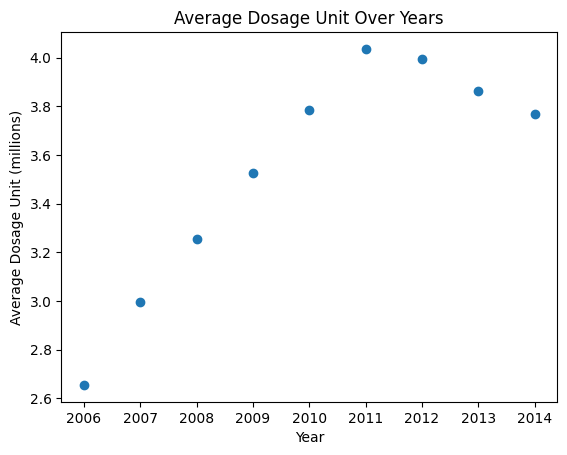

In [56]:
plt.scatter(average_dosage_per_year_df['year'], average_dosage_per_year_df['DOSAGE_UNIT'])
plt.title('Average Dosage Unit Over Years')
plt.xlabel('Year')
plt.ylabel('Average Dosage Unit (millions)')
plt.show()

In [63]:
import rpy2
import rpy2.rinterface as ri
import rpy2.robjects as ro
from rpy2.robjects.packages import importr

#ri.initr()

ModuleNotFoundError: No module named 'rpy2'